<a href="https://colab.research.google.com/github/cecilegltslmcs/cats-classification/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats Classifier

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, Sequential

%matplotlib inline

In [2]:
# Google Drive connexion
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Projets/Cats-classification/data'

Mounted at /content/drive


In [3]:
def extract_values_from_history(history):
  train_accuracy = history.history['accuracy']
  validation_accuracy = history.history['val_accuracy']

  train_loss = history.history['loss']
  validation_loss = history.history['val_loss']

  return train_accuracy, validation_accuracy, train_loss, validation_loss

def accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss):
  # Accuracy and Loss graphical representation
  plt.figure(figsize=(8, 8))

  plt.subplot(2, 1, 1)
  plt.plot(train_accuracy, label='Training Accuracy')
  plt.plot(validation_accuracy, label='Validation Accuracy')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(train_loss, label='Training Loss')
  plt.plot(validation_loss, label='Validation Loss')
  plt.ylabel('Cross Entropy')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.legend()
  plt.show()

def mean_metrics(history):
  mean_accuracy = round(np.mean(history.history["accuracy"]) * 100, 2)
  std_accuracy = round(np.std(history.history["accuracy"]) * 100, 2)
  mean_validation_accuracy = round(np.mean(history.history["val_accuracy"]) * 100, 2)
  std_validation_accuracy = round(np.std(history.history["val_accuracy"]) * 100, 2)

  mean_loss = round(np.mean(history.history["loss"]), 3)
  std_loss = round(np.std(history.history["loss"]), 3)
  mean_validation_loss = round(np.mean(history.history["loss"]), 3)
  std_validation_loss = round(np.std(history.history["loss"]), 3)

  print(f"Mean Accuracy: {mean_accuracy} +/- {std_accuracy} & Mean Validation Accuracy: {mean_validation_accuracy} +/- {std_validation_accuracy}")
  print(f"Mean Loss: {mean_loss} +/- {std_loss} & Mean Validation Loss: {mean_validation_loss} +/- {std_validation_loss}")

## 1) Reading a random picture

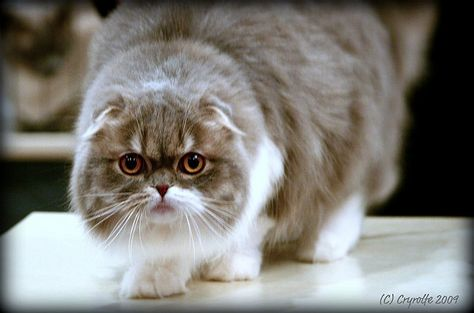

In [4]:
name = "Scottish Fold/Scottish Fold_5.jpg"
fullname = f'{path}/{name}'

# print a kitty picture
load_img(fullname)

## 2) Modelisation

### a) Preparing the data

In [5]:
img_height = 299
img_width = 299
batch_size = 20
channel = 3

In [6]:
img_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [7]:
# Creating a train set
train_set = img_gen.flow_from_directory(
    path,
    subset="training",
    seed=42,
    class_mode="sparse",
    target_size=(img_height, img_width),
    batch_size=batch_size)

Found 5600 images belonging to 20 classes.


In [8]:
# Creating a validation set
val_set = img_gen.flow_from_directory(
    path,
    subset="validation",
    seed=42,
    class_mode="sparse",
    target_size=(img_height, img_width),
    batch_size=batch_size)

Found 1400 images belonging to 20 classes.


In [9]:
num_classes = train_set.num_classes

In [10]:
train_set.class_indices

{'Abyssinian': 0,
 'American Bobtail': 1,
 'American Curl': 2,
 'American Shorthair': 3,
 'Bengal': 4,
 'Birman': 5,
 'Bombay': 6,
 'British Shorthair': 7,
 'Egyptian Mau': 8,
 'Exotic Shorthair': 9,
 'Maine Coon': 10,
 'Manx': 11,
 'Norwegian Forest': 12,
 'Persian': 13,
 'Ragdoll': 14,
 'Russian Blue': 15,
 'Scottish Fold': 16,
 'Siamese': 17,
 'Sphynx': 18,
 'Turkish Angora': 19}

### b) Custom CNN

In [11]:
model = keras.Sequential()
model.add(keras.Input(shape=(img_height, img_width, channel)))
model.add(layers.Conv2D(32, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(num_classes, activation="softmax"))

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=["accuracy"]
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 700928)            0         
                                                                 
 dense (Dense)               (None, 64)                44859456  
                                                                 
 dense_1 (Dense)             (None, 20)                1300      
                                                                 
Total params: 44,861,652
Trainable params: 44,861,652
Non-trainable params: 0
____________________________________________

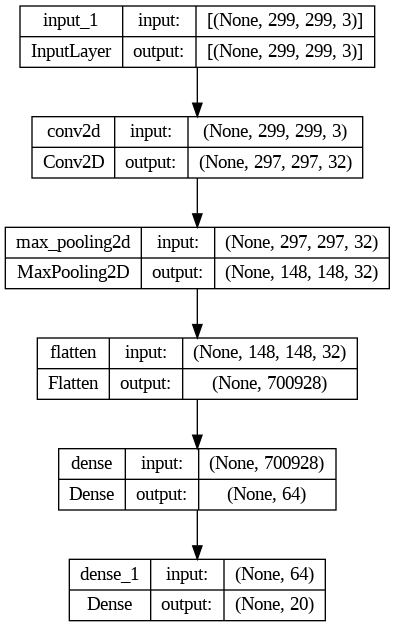

In [13]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(
    train_set,
    epochs = 10,
    validation_data=val_set
)

Epoch 1/10
 95/280 [=========>....................] - ETA: 15:39 - loss: 7.8193 - accuracy: 0.0584

In [ ]:
train_accuracy, validation_accuracy, train_loss, validation_loss = extract_values_from_history(history)

In [ ]:
accuracy_and_loss_graph(train_accuracy, validation_accurracy, train_loss, validation_loss)

In [ ]:
mean_metrics(history)

#### Data Augmentation

In [ ]:
img_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    validation_split=0.2,
    fill_mode = "nearest"
)

train_set = img_gen.flow_from_directory(
    path,
    subset="training",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width),
    batch_size=batch_size)

val_set = img_gen.flow_from_directory(
    path,
    subset="validation",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width),
    batch_size=batch_size)

In [ ]:
history = model.fit(
    train_set,
    epochs = 10,
    validation_data=val_set
)

In [ ]:
train_accuracy, validation_accuracy, train_loss, validation_loss = extract_values_from_history(history)

In [ ]:
accuracy_and_loss_graph(train_accuracy, validation_accurracy, train_loss, validation_loss)

In [ ]:
mean_metrics(history)

### b) Transfer Learning

- MobileNet
- VGG16/19
- Xception
- EfficientNet

**General**:
- [Introduction to Dropout for Regularization](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/)
- [How Do Convolutional Layers Work?](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/)

**Optimizer and Loss Functions for multiclasses classification:**

- [Adam Optimizer for multiclasses classification](https://towardsdatascience.com/multiclass-classification-neural-network-using-adam-optimizer-fb9a4d2f73f4)
- [Understanding Loss functions for classification](https://medium.com/mlearning-ai/understanding-loss-functions-for-classification-81c19ee72c2a)

**Transfer Learning**:
- [MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications](https://arxiv.org/abs/1704.04861)
- [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)
- [Xception: Deep Learning with Depthwise Separable Convolutions](https://arxiv.org/abs/1610.02357)
- [EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks](https://arxiv.org/abs/1905.11946)